In [28]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Academia/Research/2023/ccm_memory/Figures/supplement_cmn_unseen_data_specificity/cmn_network/dbs'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [29]:
# dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/unseen_data_ep.json'    #LSN
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/unseen_data_fx.json'    #DBS
# dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/unseen_data_tms.json'    #TMS

# dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/alzheimer_metaanalysis/tmp/dataset_dict.json' # ad meta analysis


What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [30]:
correlation = 'pearson'
resample_method = 'permutation'

In [31]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating Alzheimer Fornix DBS


# 02 - Compare How 2 Different Maps Relate to Your Outcome
- Enter paths to ROIs you want to test. Will see if one better predicts outcomes than the other
- Only run one dataset at a time. 

In [32]:
map_one= '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/memory_map/convergent_memory_map.nii.gz'

# map_one = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/memory_map/convergent_memory_cores.nii'

# map_two = '/Volumes/HowExp/resources/atlases/atlases/memory/hippocampus_2mm.nii.gz'      
# map_two = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/CBCT Networks/Memory Network (Ferguson 2019).nii' #amnesia
# map_two = '/Volumes/HowExp/resources/atlases/atlases/memory/hippocampus_2mm.nii.gz' #HPC
# map_two = '/Volumes/HowExp/resources/atlases/atlases/circuit_of_papez/circuit_of_papez_BL.nii.gz' #COP
# 
# map_two = '/Volumes/HowExp/resources/atlases/atlases/memory/Hippocampus__Precom_T.nii' # HPC Conn
# map_two = '/Users/cu135/hires_backdrops/cop/sub-Papez_Bead/ses-01/roi/sub-Papez_Bead_MNI152_T1_3.0mm_sphere_roi_composite_Precom_T.nii.gz' # COP conn
map_two = '/Volumes/HowExp/resources/atlases/atlases/Canonical Networks (Yeo 2011)/Yeo_JNeurophysiol11_MNI152_connectivity/Default_Connectivity.nii' #dmn


In [33]:
from calvin_utils.ccm_utils.convergent_loocv import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='avg_in_subject',
                               method=correlation,
                               out_dir=out_dir,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path=None,
                               )

Removing NaNS from self.coor_map_dict.


In [34]:
loocv_analyzer.compare_roi_correlations(roi1=map_one, roi2=map_two, method=resample_method, n_iter=1000, seed=42, delta_r2=True)

100%|██████████| 1000/1000 [00:52<00:00, 19.05it/s]


Below results used delta explained variance (r-squared): True


100%|██████████| 1/1 [00:00<00:00, 19.97it/s]

Overall permutation:
     observed avg delta R = 0.1794, p = 0.0840


Visualize the Differences

The differences are typically stored in:
- roi1 : BootstrapVisualizer.r_values['roi1]
- roi2 : BootstrapVisualizer.r_values['roi2]

In [41]:
map1_name="Convergent"
map2_name="Default"

Statistical method: permutation, one-tailed
0.17942968423981087


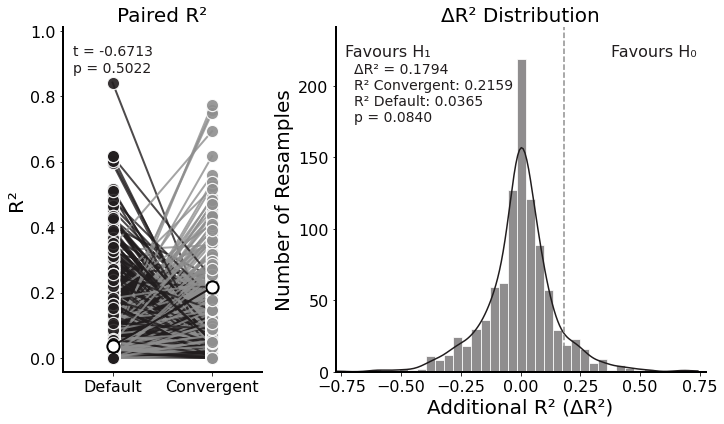

In [42]:
import numpy as np
from calvin_utils.ccm_utils.resampling_plot import ResampleVisualizer
visualizer = ResampleVisualizer(
    stat_array_1=np.array(loocv_analyzer.r_values['roi1']),
    stat_array_2=np.array(loocv_analyzer.r_values['roi2']),
    model1_name=map1_name,
    model2_name=map2_name,
    out_dir=out_dir,
    observed_stat_array= [np.array(loocv_analyzer.observed_r_values['roi1']), np.array(loocv_analyzer.observed_r_values['roi2'])],
    method=resample_method
)
visualizer.draw()

Visualize the Different Scatterplots

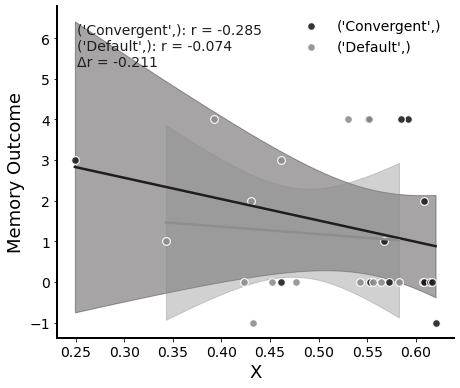

In [37]:
from calvin_utils.ccm_utils.delta_scatterplot import DeltaCorrelationScatter
vis = DeltaCorrelationScatter(x_array_1=loocv_analyzer.observed_x1, x_array_2=loocv_analyzer.observed_x2, y_array=loocv_analyzer.observed_y,
                        y_label='Memory Outcome', label_1=map1_name, label_2=map2_name, stat_label='r', out_dir=out_dir, method=correlation)
vis.draw()

That's all

-Calvin